In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("endpoints.csv")

In [13]:
df["int_type"] = "All"
df.loc[np.logical_not(df["itn"]),"int_type"] = "No ITN"
df.loc[np.logical_not(df["irs"]),"int_type"] = "No IRS"
df.loc[np.logical_not(df["msat"]),"int_type"] = "No MSAT"
df.loc[np.logical_not(df["mda"]),"int_type"] = "No MDA"
df.loc[np.logical_not(df["chw_rcd"]),"int_type"] = "No CHW RCD"
df.loc[np.logical_not(df["chw_hs"]),"int_type"] = "No CHW HS"
df.loc[np.logical_and(np.logical_not(df["chw_rcd"]),np.logical_not(df["chw_hs"])) ,"int_type"] = "No CHW"

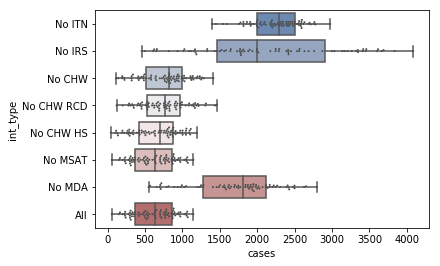

In [41]:
sns.boxplot(x="cases", y="int_type", data=df,
            whis="range", palette="vlag")
sns.swarmplot(x="cases", y="int_type", data=df,
              size=2, color=".3", linewidth=0)

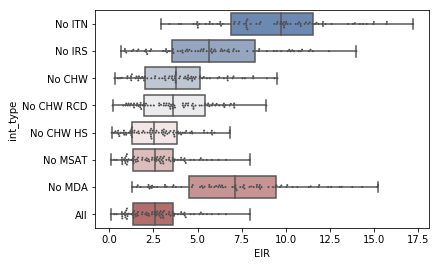

In [42]:
sns.boxplot(x="EIR", y="int_type", data=df,
            whis="range", palette="vlag")
sns.swarmplot(x="EIR", y="int_type", data=df,
              size=2, color=".3", linewidth=0)

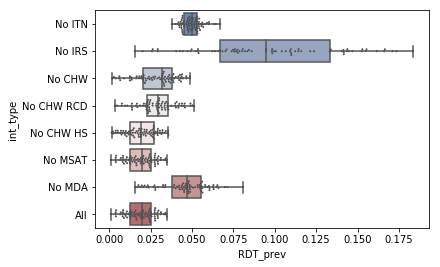

In [44]:
sns.boxplot(x="RDT_prev", y="int_type", data=df,
            whis="range", palette="vlag")
sns.swarmplot(x="RDT_prev", y="int_type", data=df,
              size=2, color=".3", linewidth=0)

In [43]:
df.columns

Index(['EIR', 'RDT_prev', 'Run_Number', 'arab', 'cases', 'catch', 'chw_hs',
       'chw_rcd', 'funest', 'irs', 'itn', 'mda', 'msat', 'sample', 'true_prev',
       'int_type'],
      dtype='object')

# May 19.  10 catchments

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("endpoints.csv")

In [14]:
# Arab funest values for each
bar = df[df["Run_Number"]==1]
foo = bar.groupby("catch")

a_m = []
a_sd = []
f_m = []
f_sd = []
cl = []

for c, sdf in foo:
    cl += [c]
    a_m += [np.mean(sdf["arab"])]
    f_m += [np.mean(sdf["funest"])]
    a_sd += [np.std(sdf["arab"])]
    f_sd += [np.std(sdf["funest"])]

cdf = pd.DataFrame({"catch": cl,
                   "arab_mean": a_m,
                   "funest_mean": f_m,
                   "arab_sd": a_sd,
                   "funest_sd": f_sd})

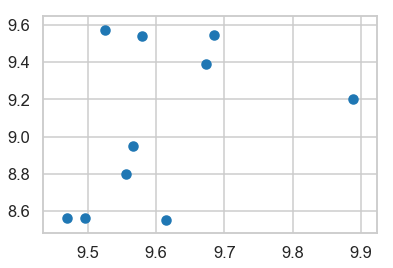

In [15]:
plt.scatter(cdf["arab_mean"],cdf["funest_mean"])

In [16]:
sns.set_style("whitegrid")
sns.set_context("talk")

<ErrorbarContainer object of 3 artists>

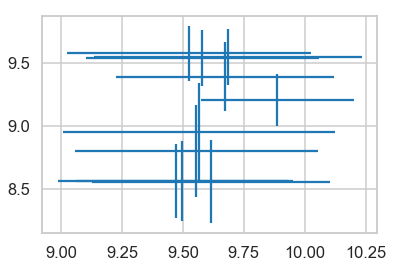

In [17]:
plt.errorbar(cdf["arab_mean"],cdf["funest_mean"], xerr=cdf["arab_sd"], yerr=cdf["funest_sd"], fmt='none')

In [18]:
df.columns

Index(['EIR', 'RDT_prev', 'Run_Number', 'arab', 'cases', 'catch', 'chw_hs',
       'chw_rcd', 'funest', 'irs', 'itn', 'mda', 'msat', 'sample', 'true_prev',
       'int_type'],
      dtype='object')

In [19]:
def make_ie_df(edf):
    a = edf.groupby("catch","int_type","Run_Number").agg({"EIR": "median",
                                                         "RDT_prev": "median",
                                                         "cases": "median"})
    
    
#     for i,sdf in a:
        

In [20]:
def get_ie(df):
    a = df.groupby(["catch","int_type","sample"]).agg({"EIR": "median",
                                                         "RDT_prev": "median",
                                                         "cases": "median"})
    a.reset_index(inplace=True)

    b = a.copy(deep=True)
    # b = a.groupby(["catch","int_type","sample"])
    b0 = b[b["int_type"]=="All"]
    b0 = b0[["catch", "sample", "cases", "EIR", "RDT_prev"]]
    b0.rename(columns={"cases":"cases_0",
                      "EIR": "EIR_0",
                      "RDT_prev": "RDT_prev_0"}, inplace=True)

    bi = b[b["int_type"]!= "All"]

    bm = bi.merge(b0,how="left",on=["catch","sample"])
    bm["d_cases"] = bm["cases"]-bm["cases_0"]
    bm["d_EIR"] = bm["EIR"]-bm["EIR_0"]
    bm["d_RDT_prev"] = bm["RDT_prev"]-bm["RDT_prev_0"]

    bm["rel_d_cases"] = bm["d_cases"]/bm["cases_0"]
    bm["rel_d_EIR"] = bm["d_EIR"]/bm["EIR_0"]
    bm["rel_d_RDT_prev"] = bm["d_RDT_prev"]/bm["RDT_prev_0"]
    
    return [a,bm]


In [21]:
a,bm = get_ie(df)

In [22]:
bm

,catch,int_type,sample,EIR,RDT_prev,cases,cases_0,EIR_0,RDT_prev_0,d_cases,d_EIR,d_RDT_prev,rel_d_cases,rel_d_EIR,rel_d_RDT_prev
0,batoka,No CHW,110,1.242384,0.015431,338,218,0.846450,0.004919,120,0.395934,0.010511,0.550459,0.467759,2.136813
1,batoka,No CHW,127,1.682694,0.013932,395,353,1.596935,0.011781,42,0.085759,0.002151,0.118980,0.053702,0.182557
2,batoka,No CHW,155,1.381816,0.012314,368,279,0.946031,0.008332,89,0.435785,0.003981,0.318996,0.460646,0.477774
3,batoka,No CHW,158,3.184881,0.030749,669,532,1.775633,0.016296,137,1.409248,0.014453,0.257519,0.793659,0.886953
4,batoka,No CHW,159,5.354828,0.044151,1005,634,3.222577,0.020553,371,2.132252,0.023598,0.585174,0.661661,1.148192
5,batoka,No CHW,165,0.786405,0.006396,180,145,0.417061,0.003833,35,0.369344,0.002563,0.241379,0.885586,0.668557
6,batoka,No CHW,168,0.609527,0.006584,192,298,0.732582,0.009421,-106,-0.123054,-0.002836,-0.355705,-0.167973,-0.301086
7,batoka,No CHW,169,1.547906,0.018218,452,197,0.707756,0.003930,255,0.840150,0.014288,1.294416,1.187061,3.635368
8,batoka,No CHW,170,2.006996,0.019368,556,418,1.565541,0.012028,138,0.441456,0.007340,0.330144,0.281983,0.610250
9,batoka,No CHW,171,1.863599,0.017789,433,434,1.726359,0.012316,-1,0.137240,0.005473,-0.002304,0.079497,0.444373


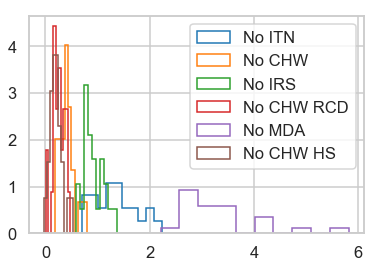

In [23]:
c = "siansowa"
for it in list(set(bm["int_type"])):
    foo = bm[bm["catch"]==c]
    if it != "No MSAT":
        plt.hist(foo["rel_d_cases"][foo["int_type"]==it],label=it, histtype='step',density=True)
plt.legend()

In [24]:
list(set(bm["catch"]))

['batoka',
 'maamba',
 'sianyoolo',
 'kasikili',
 'nanduba',
 'jamba',
 'siansowa',
 'luyaba',
 'jembo',
 'dimbwe']

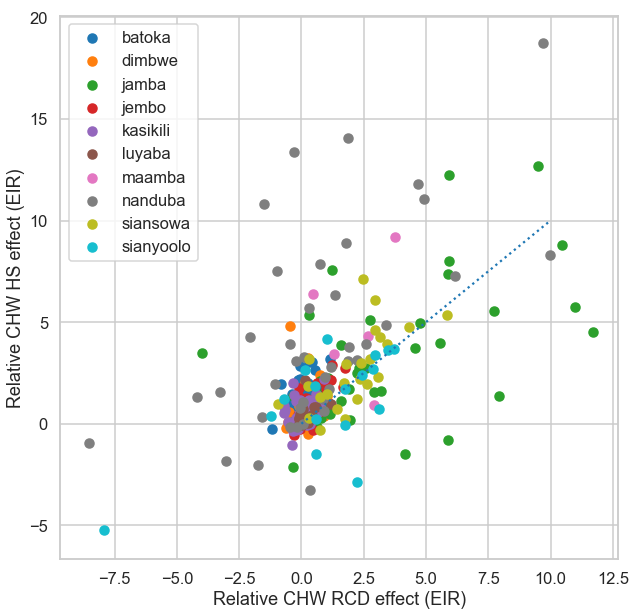

In [25]:
# Scatter plot of CHW_HS vs CHW_RCD
foo = bm.groupby("catch")
plt.figure(figsize=(10,10))
for c,sdf in foo:
    plt.scatter(sdf["d_EIR"][sdf["int_type"]=="No CHW HS"],
                sdf["d_EIR"][sdf["int_type"]=="No CHW RCD"],
               label=c)
    
plt.plot(np.array([0,10]),np.array([0,10]),linestyle='dotted')
plt.xlabel("Relative CHW RCD effect (EIR)")
plt.ylabel("Relative CHW HS effect (EIR)")
plt.legend()

(0, 1)

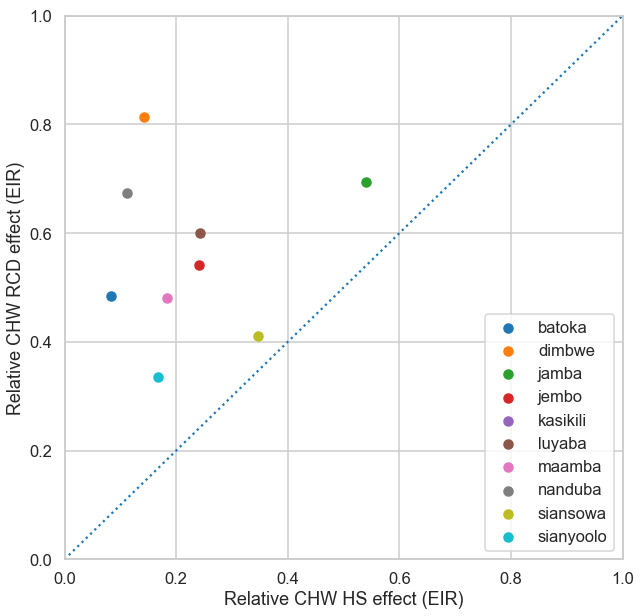

In [107]:
# Convert to error bars:
foo = bm.groupby("catch")
plt.figure(figsize=(10,10))
for c,sdf in foo:
    x = np.median(sdf["rel_d_EIR"][sdf["int_type"]=="No CHW HS"])
    y = np.median(sdf["rel_d_EIR"][sdf["int_type"]=="No CHW RCD"])
    xe = np.std(sdf["rel_d_EIR"][sdf["int_type"]=="No CHW HS"])
    ye = np.std(sdf["rel_d_EIR"][sdf["int_type"]=="No CHW RCD"])
    plt.scatter([x],[y],label=c)
#     plt.errorbar([x],[y], xerr=xe, yerr=ye,label=c)
    
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='dotted')
plt.ylabel("Relative CHW RCD effect (EIR)")
plt.xlabel("Relative CHW HS effect (EIR)")
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])

(0, 1)

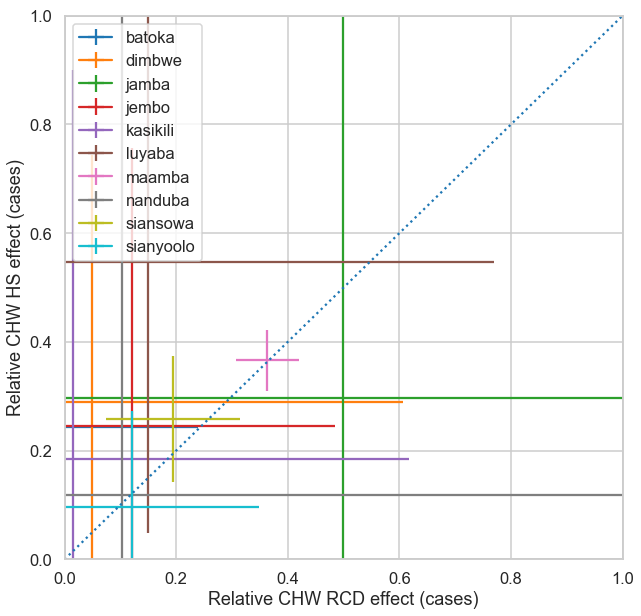

In [27]:
# Convert to error bars:
foo = bm.groupby("catch")
plt.figure(figsize=(10,10))
for c,sdf in foo:
    x = np.median(sdf["rel_d_cases"][sdf["int_type"]=="No CHW HS"])
    y = np.median(sdf["rel_d_cases"][sdf["int_type"]=="No CHW RCD"])
    xe = np.std(sdf["rel_d_cases"][sdf["int_type"]=="No CHW HS"])
    ye = np.std(sdf["rel_d_cases"][sdf["int_type"]=="No CHW RCD"])
    plt.errorbar([x],[y], xerr=xe, yerr=ye,label=c)
    
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='dotted')
plt.xlabel("Relative CHW RCD effect (cases)")
plt.ylabel("Relative CHW HS effect (cases)")
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])

(0, 1)

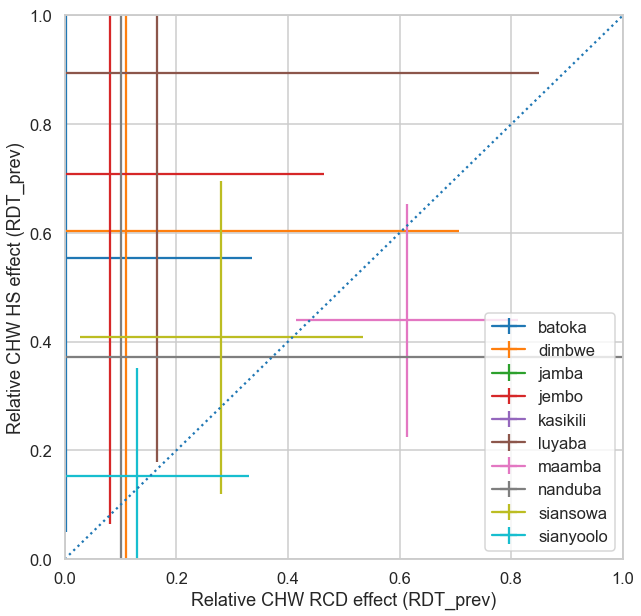

In [28]:
# Convert to error bars:
foo = bm.groupby("catch")
plt.figure(figsize=(10,10))
for c,sdf in foo:
    x = np.median(sdf["rel_d_RDT_prev"][sdf["int_type"]=="No CHW HS"])
    y = np.median(sdf["rel_d_RDT_prev"][sdf["int_type"]=="No CHW RCD"])
    xe = np.std(sdf["rel_d_RDT_prev"][sdf["int_type"]=="No CHW HS"])
    ye = np.std(sdf["rel_d_RDT_prev"][sdf["int_type"]=="No CHW RCD"])
    plt.errorbar([x],[y], xerr=xe, yerr=ye,label=c)
    
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='dotted')
plt.xlabel("Relative CHW RCD effect (RDT_prev)")
plt.ylabel("Relative CHW HS effect (RDT_prev)")
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])

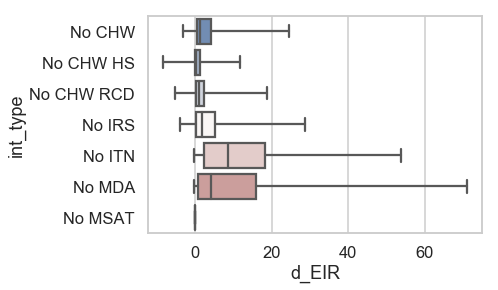

In [29]:
sns.boxplot(x="d_EIR", y="int_type", data=bm,
            whis="range", palette="vlag")
# sns.swarmplot(x="rel_d_RDT_prev", y="int_type", data=bm,
#               size=2, color=".3", linewidth=0)

In [30]:
bm

,catch,int_type,sample,EIR,RDT_prev,cases,cases_0,EIR_0,RDT_prev_0,d_cases,d_EIR,d_RDT_prev,rel_d_cases,rel_d_EIR,rel_d_RDT_prev
0,batoka,No CHW,110,1.242384,0.015431,338,218,0.846450,0.004919,120,0.395934,0.010511,0.550459,0.467759,2.136813
1,batoka,No CHW,127,1.682694,0.013932,395,353,1.596935,0.011781,42,0.085759,0.002151,0.118980,0.053702,0.182557
2,batoka,No CHW,155,1.381816,0.012314,368,279,0.946031,0.008332,89,0.435785,0.003981,0.318996,0.460646,0.477774
3,batoka,No CHW,158,3.184881,0.030749,669,532,1.775633,0.016296,137,1.409248,0.014453,0.257519,0.793659,0.886953
4,batoka,No CHW,159,5.354828,0.044151,1005,634,3.222577,0.020553,371,2.132252,0.023598,0.585174,0.661661,1.148192
5,batoka,No CHW,165,0.786405,0.006396,180,145,0.417061,0.003833,35,0.369344,0.002563,0.241379,0.885586,0.668557
6,batoka,No CHW,168,0.609527,0.006584,192,298,0.732582,0.009421,-106,-0.123054,-0.002836,-0.355705,-0.167973,-0.301086
7,batoka,No CHW,169,1.547906,0.018218,452,197,0.707756,0.003930,255,0.840150,0.014288,1.294416,1.187061,3.635368
8,batoka,No CHW,170,2.006996,0.019368,556,418,1.565541,0.012028,138,0.441456,0.007340,0.330144,0.281983,0.610250
9,batoka,No CHW,171,1.863599,0.017789,433,434,1.726359,0.012316,-1,0.137240,0.005473,-0.002304,0.079497,0.444373


In [32]:
# plt.scatter(cdf["arab_mean"],cdf["funest_mean"],c=)

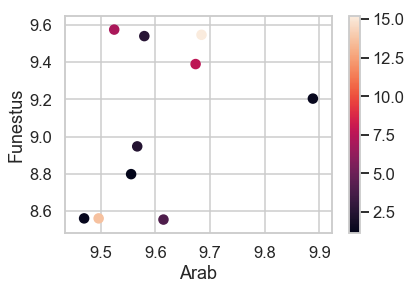

In [33]:
foo = bm.groupby(["catch","int_type"]).agg("median")
foo.reset_index(inplace=True)

plt.figure()
for it in list(set(foo["int_type"])):
    if it == "No ITN":
        sdf = foo[foo["int_type"]==it]
        h = cdf.merge(sdf,on="catch")
        plt.scatter(h["arab_mean"],h["funest_mean"],c=h["rel_d_EIR"])
        plt.colorbar()
        plt.xlabel("Arab")
        plt.ylabel("Funestus")

In [34]:
foo

,catch,int_type,sample,EIR,RDT_prev,cases,cases_0,EIR_0,RDT_prev_0,d_cases,d_EIR,d_RDT_prev,rel_d_cases,rel_d_EIR,rel_d_RDT_prev
0,batoka,No CHW,187.5,3.716599,0.030759,811.5,633.5,2.415690,0.020276,136.0,0.957276,0.009650,0.246313,0.464949,0.518429
1,batoka,No CHW HS,187.5,2.638263,0.021225,741.5,633.5,2.415690,0.020276,-1.0,0.170746,0.000037,-0.004705,0.082980,0.001687
2,batoka,No CHW RCD,187.5,3.786722,0.028521,757.0,633.5,2.415690,0.020276,134.5,1.394546,0.009700,0.243598,0.484531,0.553845
3,batoka,No IRS,187.5,5.829013,0.096655,2165.0,633.5,2.415690,0.020276,1483.0,2.850675,0.075805,2.461683,1.258158,4.183408
4,batoka,No ITN,187.5,9.342974,0.050381,2284.5,633.5,2.415690,0.020276,1645.0,6.436267,0.031156,2.803665,2.630540,1.543369
5,batoka,No MDA,187.5,6.459598,0.046414,1672.5,633.5,2.415690,0.020276,1063.0,4.031448,0.025587,1.831069,1.723488,1.390272
6,batoka,No MSAT,187.5,2.415690,0.020276,633.5,633.5,2.415690,0.020276,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,dimbwe,No CHW,193.5,2.317104,0.034808,347.5,212.0,1.394789,0.016686,143.5,1.139919,0.017786,0.510878,0.806648,0.897210
8,dimbwe,No CHW HS,193.5,2.000898,0.023311,256.0,212.0,1.394789,0.016686,17.5,0.277512,0.002410,0.049486,0.141456,0.109282
9,dimbwe,No CHW RCD,193.5,1.843794,0.028438,258.0,212.0,1.394789,0.016686,65.5,0.661477,0.010798,0.289942,0.813488,0.603609


In [41]:
h

,catch,int_type,sample,EIR,RDT_prev,cases,cases_0,EIR_0,RDT_prev_0,d_cases,d_EIR,d_RDT_prev,rel_d_cases,rel_d_EIR,rel_d_RDT_prev
0,batoka,No CHW,110,1.242384,0.015431,338,218,0.846450,0.004919,120,0.395934,0.010511,0.550459,0.467759,2.136813
1,batoka,No CHW,127,1.682694,0.013932,395,353,1.596935,0.011781,42,0.085759,0.002151,0.118980,0.053702,0.182557
2,batoka,No CHW,155,1.381816,0.012314,368,279,0.946031,0.008332,89,0.435785,0.003981,0.318996,0.460646,0.477774
3,batoka,No CHW,158,3.184881,0.030749,669,532,1.775633,0.016296,137,1.409248,0.014453,0.257519,0.793659,0.886953
4,batoka,No CHW,159,5.354828,0.044151,1005,634,3.222577,0.020553,371,2.132252,0.023598,0.585174,0.661661,1.148192
5,batoka,No CHW,165,0.786405,0.006396,180,145,0.417061,0.003833,35,0.369344,0.002563,0.241379,0.885586,0.668557
6,batoka,No CHW,168,0.609527,0.006584,192,298,0.732582,0.009421,-106,-0.123054,-0.002836,-0.355705,-0.167973,-0.301086
7,batoka,No CHW,169,1.547906,0.018218,452,197,0.707756,0.003930,255,0.840150,0.014288,1.294416,1.187061,3.635368
8,batoka,No CHW,170,2.006996,0.019368,556,418,1.565541,0.012028,138,0.441456,0.007340,0.330144,0.281983,0.610250
9,batoka,No CHW,171,1.863599,0.017789,433,434,1.726359,0.012316,-1,0.137240,0.005473,-0.002304,0.079497,0.444373


# May 21.  Looking at one catchment at a time.

In [46]:
cm = pd.read_csv("calib_map.csv")
bm = bm.merge(cm[["catch", "sample","arab","funest"]], how="left", on=["catch","sample"])

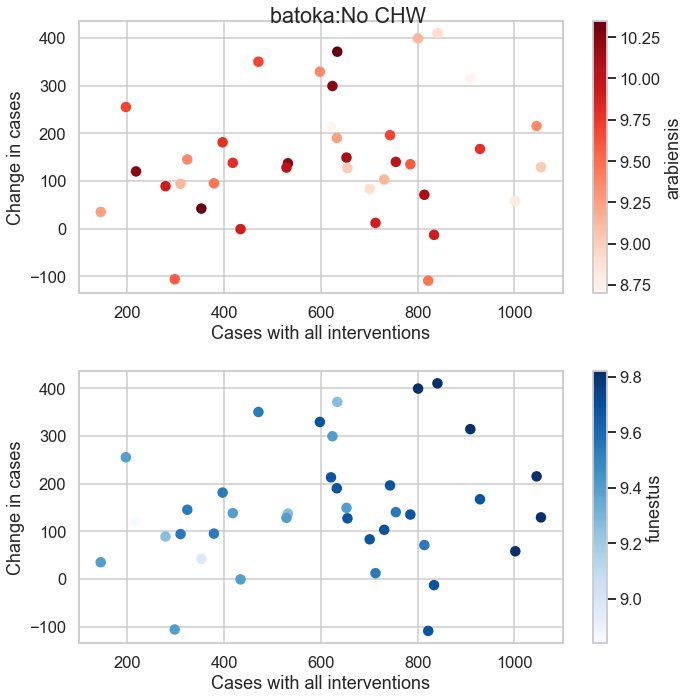

In [79]:
c = "batoka"
i = "No CHW"
h = bm[np.logical_and(bm["catch"]==c, bm["int_type"]==i)]
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.scatter(h["cases_0"], h["d_cases"], c=h["arab"], cmap="Reds")
# sns.lmplot(x="cases_0",y="d_cases",data=h, hue="arab")
plt.xlabel("Cases with all interventions")
plt.ylabel("Change in cases")
plt.suptitle("{}:{}".format(c,i))
plt.colorbar(label="arabiensis")
plt.subplot(212)
plt.scatter(h["cases_0"], h["d_cases"], c=h["funest"], cmap="Blues")
plt.colorbar(label="funestus")
plt.xlabel("Cases with all interventions")
plt.ylabel("Change in cases")
plt.tight_layout()

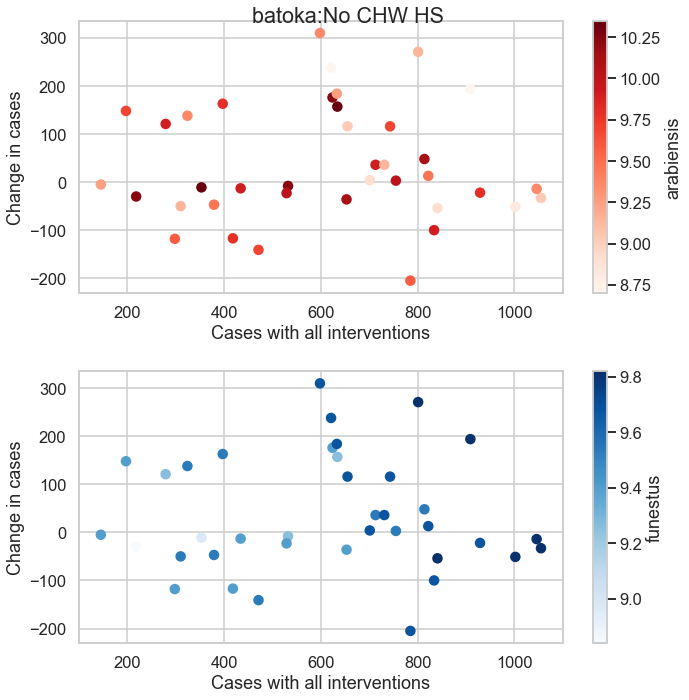

In [80]:
c = "batoka"
i = "No CHW HS"
h = bm[np.logical_and(bm["catch"]==c, bm["int_type"]==i)]
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.scatter(h["cases_0"], h["d_cases"], c=h["arab"], cmap="Reds")
# sns.lmplot(x="cases_0",y="d_cases",data=h, hue="arab")
plt.xlabel("Cases with all interventions")
plt.ylabel("Change in cases")
plt.suptitle("{}:{}".format(c,i))
plt.colorbar(label="arabiensis")
plt.subplot(212)
plt.scatter(h["cases_0"], h["d_cases"], c=h["funest"], cmap="Blues")
plt.colorbar(label="funestus")
plt.xlabel("Cases with all interventions")
plt.ylabel("Change in cases")
plt.tight_layout()


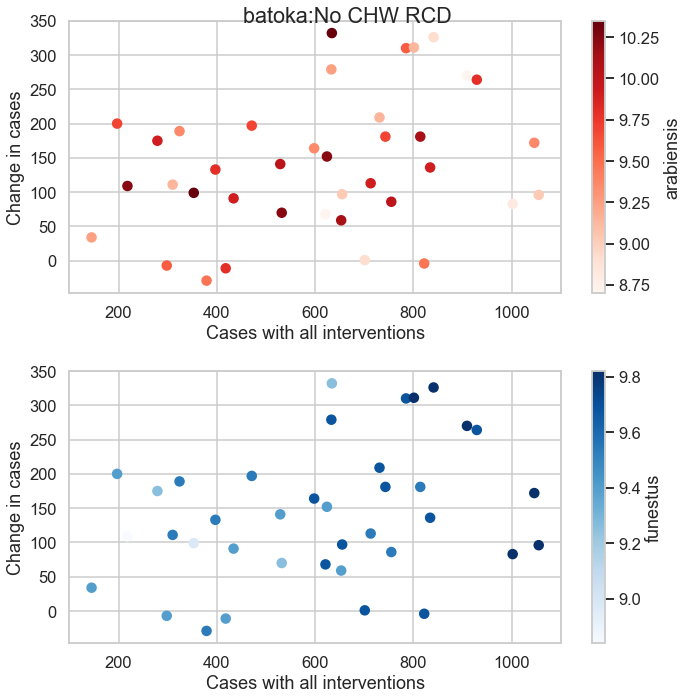

In [81]:
c = "batoka"
i = "No CHW RCD"
h = bm[np.logical_and(bm["catch"]==c, bm["int_type"]==i)]
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.scatter(h["cases_0"], h["d_cases"], c=h["arab"], cmap="Reds")
# sns.lmplot(x="cases_0",y="d_cases",data=h, hue="arab")
plt.xlabel("Cases with all interventions")
plt.ylabel("Change in cases")
plt.suptitle("{}:{}".format(c,i))
plt.colorbar(label="arabiensis")
plt.subplot(212)
plt.scatter(h["cases_0"], h["d_cases"], c=h["funest"], cmap="Blues")
plt.colorbar(label="funestus")
plt.xlabel("Cases with all interventions")
plt.ylabel("Change in cases")
plt.tight_layout()


c:\users\jsuresh\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


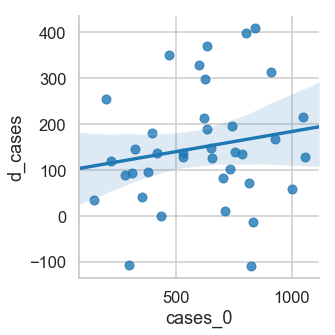

In [72]:
sns.lmplot(x="cases_0",y="d_cases",data=h)

In [84]:
for c in list(set(bm["catch"])):
    for i in list(set(bm["int_type"])):
        plt.figure()
        h = bm[np.logical_and(bm["catch"]==c, bm["int_type"]==i)]
        plt.figure(figsize=(10,10))
        plt.subplot(211)
        plt.scatter(h["cases_0"], h["d_cases"], c=h["arab"], cmap="Reds")
        # sns.lmplot(x="cases_0",y="d_cases",data=h, hue="arab")
        plt.xlabel("Cases with all interventions")
        plt.ylabel("Change in cases")
        plt.suptitle("{}:{}".format(c,i))
        plt.colorbar(label="arabiensis")
        plt.subplot(212)
        plt.scatter(h["cases_0"], h["d_cases"], c=h["funest"], cmap="Blues")
        plt.colorbar(label="funestus")
        plt.xlabel("Cases with all interventions")
        plt.ylabel("Change in cases")
        plt.tight_layout()
        plt.savefig("C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/zambia_gridded_sims/kariba_gridded_sims/figs/20190521_catchment_stories/{}_{}".format(c,i))
        plt.close('all')

In [90]:
for c in list(set(bm["catch"])):
    plt.figure()
    plt.figure(figsize=(10,10))
    for i in ["No CHW HS", "No CHW RCD", "No CHW"]:
        h = bm[np.logical_and(bm["catch"]==c, bm["int_type"]==i)]
        plt.scatter(h["cases_0"], h["d_cases"], label=i)
#         sns.lmplot("cases_0","d_cases", data=h)
        plt.xlabel("Cases with all interventions")
        plt.ylabel("Change in cases")
        plt.legend()
    plt.savefig("C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/zambia_gridded_sims/kariba_gridded_sims/figs/20190521_catchment_stories/{}".format(c))
    plt.close('all')

In [99]:
for c in list(set(bm["catch"])):
    for m in ["EIR", "cases", "RDT_prev"]:
        for t in ["absolute","relative"]:
            plt.figure()
            plt.figure(figsize=(20,20))
            h = bm[np.logical_and(bm["catch"]==c, bm["int_type"].isin(["No CHW","No CHW HS", "No CHW RCD"]))]
            if t == "absolute":
                y = "rel_d_{}".format(m)
            else:
                y = "d_{}".format(m)
            sns.lmplot("{}_0".format(m),y, data=h, hue="int_type")
            plt.xlabel("{} with all interventions".format(m))
            plt.ylabel("Change in {}".format(m))
            plt.savefig("C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/zambia_gridded_sims/kariba_gridded_sims/figs/20190521_catchment_stories/{}_{}_{}".format(c,m,t))
            plt.close('all')

c:\users\jsuresh\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [93]:
bm["int_type"].isin(["No CHW"])

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
2189    False
2190    False
2191    False
2192    False
2193    False
2194    False
2195    False
2196    False
2197    False
2198    False
2199    False
2200    False
2201    False
2202    False
2203    False
2204    False
2205    False
2206    False
2207    False
2208    False
2209    False
2210    False
2211    False
2212    False
2213    False
2214    False
2215    False
2216    False
2217    False
2218    False
Name: int_type, Length: 2219, dtype: bool

(0, 1)

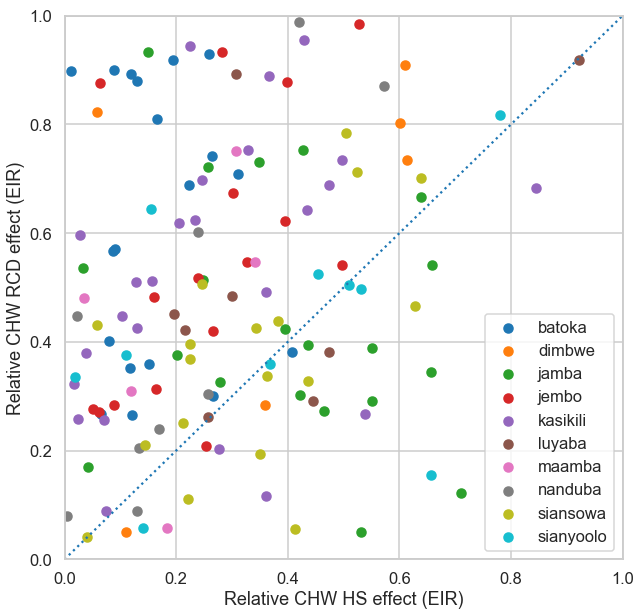

In [108]:
# Convert to error bars:
foo = bm.groupby("catch")
plt.figure(figsize=(10,10))
for c,sdf in foo:
    x = sdf["rel_d_EIR"][sdf["int_type"]=="No CHW HS"]
    y = sdf["rel_d_EIR"][sdf["int_type"]=="No CHW RCD"]
    plt.scatter(x,y,label=c)
#     plt.errorbar([x],[y], xerr=xe, yerr=ye,label=c)
    
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='dotted')
plt.ylabel("Relative CHW RCD effect (EIR)")
plt.xlabel("Relative CHW HS effect (EIR)")
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])

In [115]:
foo = bm.groupby("catch")

i = "RDT_prev"
for c,sdf in foo:
    plt.figure(figsize=(10,10))
    x = sdf["rel_d_{}".format(i)][sdf["int_type"]=="No CHW HS"]
    y = sdf["rel_d_{}".format(i)][sdf["int_type"]=="No CHW RCD"]
    plt.scatter(x,y,label=c)
    plt.plot(np.array([0,3]),np.array([0,3]),linestyle='dotted',c='gray')
    plt.ylabel("Relative CHW RCD effect ({})".format(i))
    plt.xlabel("Relative CHW HS effect ({})".format(i))
    plt.legend()
    plt.xlim([0,3])
    plt.ylim([0,3])
    plt.title(c)
    plt.savefig("C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/zambia_gridded_sims/kariba_gridded_sims/figs/20190521_catchment_stories/{}_relative_{}.png".format(c,i))
    plt.close('all')
    
    #     plt.errorbar([x],[y], xerr=xe, yerr=ye,label=c)
    
